In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
import seaborn as sns
import sqlite3

In [78]:
attr = pd.read_excel('CCRQM_NCHU_衡量變數.xlsx')
data = pd.read_csv('dfdata_補值 (1).csv', encoding='big5')

In [79]:
# data = data.fillna(0)
data

,公司碼,財報年月,A104,A105,A106,A109,A111,A115,A116,A140,...,XPYR,財報年月_r$,產業碼,產業名,year,上市板塊,是否違約,原因,delete,市場年度
0,2,2014-12-01,16.15,29.94,14.65,13.25,28.67,3.83,69.29,4.18,...,0.0,2014-12-01,25A,建設,2014.0,主板,0.0,NaN,0.0,2015.0
1,2,2015-12-01,20.71,28.66,14.50,13.43,8.31,4.88,63.30,5.00,...,0.0,2015-12-01,25A,建設,2015.0,主板,0.0,NaN,0.0,2016.0
2,2,2016-12-01,19.16,28.90,14.23,11.89,16.60,4.17,63.86,4.70,...,0.0,2016-12-01,25A,建設,2016.0,主板,0.0,NaN,0.0,2017.0
3,2,2017-12-01,20.92,33.71,18.75,15.49,34.28,3.92,77.07,4.51,...,0.0,2017-12-01,25A,建設,2017.0,主板,0.0,NaN,0.0,2018.0
4,2,2018-12-01,23.06,37.14,22.77,16.74,11.42,4.02,72.33,4.88,...,0.0,2018-12-01,25A,建設,2018.0,主板,0.0,NaN,0.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9144,600856,2015-12-01,17.30,21.20,16.94,14.75,3.64,9.80,57.71,10.28,...,0.0,2015-12-01,99D2,天然氣,2015.0,主板,0.0,NaN,0.0,2016.0
9145,600856,2016-12-01,15.20,27.15,17.31,13.97,9.57,6.76,27.33,7.24,...,0.0,2016-12-01,99D2,天然氣,2016.0,主板,0.0,NaN,0.0,2017.0
9146,600856,2017-12-01,14.20,23.64,16.88,11.95,10.67,6.93,64.34,7.49,...,0.0,2017-12-01,99D2,天然氣,2017.0,主板,1.0,逾期,0.0,2018.0
9147,600857,2014-12-01,4.46,11.15,2.86,3.52,2.17,3.36,156.46,4.51,...,0.0,2014-12-01,29A1,百貨購物中,2014.0,主板,0.0,NaN,0.0,2015.0


In [80]:
non_na_index = data['是否違約'].dropna().index
data = data.loc[non_na_index]
data

,公司碼,財報年月,A104,A105,A106,A109,A111,A115,A116,A140,...,XPYR,財報年月_r$,產業碼,產業名,year,上市板塊,是否違約,原因,delete,市場年度
0,2,2014-12-01,16.15,29.94,14.65,13.25,28.67,3.83,69.29,4.18,...,0.0,2014-12-01,25A,建設,2014.0,主板,0.0,NaN,0.0,2015.0
1,2,2015-12-01,20.71,28.66,14.50,13.43,8.31,4.88,63.30,5.00,...,0.0,2015-12-01,25A,建設,2015.0,主板,0.0,NaN,0.0,2016.0
2,2,2016-12-01,19.16,28.90,14.23,11.89,16.60,4.17,63.86,4.70,...,0.0,2016-12-01,25A,建設,2016.0,主板,0.0,NaN,0.0,2017.0
3,2,2017-12-01,20.92,33.71,18.75,15.49,34.28,3.92,77.07,4.51,...,0.0,2017-12-01,25A,建設,2017.0,主板,0.0,NaN,0.0,2018.0
4,2,2018-12-01,23.06,37.14,22.77,16.74,11.42,4.02,72.33,4.88,...,0.0,2018-12-01,25A,建設,2018.0,主板,0.0,NaN,0.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,600856,2014-12-01,28.70,24.48,20.10,47.68,58.73,15.50,50.70,-0.41,...,0.0,2014-12-01,29A1,百貨購物中,2014.0,主板,0.0,NaN,0.0,2015.0
9144,600856,2015-12-01,17.30,21.20,16.94,14.75,3.64,9.80,57.71,10.28,...,0.0,2015-12-01,99D2,天然氣,2015.0,主板,0.0,NaN,0.0,2016.0
9145,600856,2016-12-01,15.20,27.15,17.31,13.97,9.57,6.76,27.33,7.24,...,0.0,2016-12-01,99D2,天然氣,2016.0,主板,0.0,NaN,0.0,2017.0
9146,600856,2017-12-01,14.20,23.64,16.88,11.95,10.67,6.93,64.34,7.49,...,0.0,2017-12-01,99D2,天然氣,2017.0,主板,1.0,逾期,0.0,2018.0


## Drop nan
僅保留沒有NA值的columns

In [81]:
col_na = data.apply(lambda x:x.isna().sum())
# col_na[col_na<len(data)*0.1].sort_values(ascending=False)
non_na_col = col_na[col_na==0].index
data = data.loc[:,non_na_col]
data

,公司碼,財報年月,A105,A106,A116,A401,A509,A511,A517,A519,...,XMTG,XPYR,財報年月_r$,產業碼,產業名,year,上市板塊,是否違約,delete,市場年度
0,2,2014-12-01,29.94,14.65,69.29,9.03,101.74,0.0,1.08,101.74,...,0.00,0.0,2014-12-01,25A,建設,2014.0,主板,0.0,0.0,2015.0
1,2,2015-12-01,28.66,14.50,63.30,31.97,113.69,0.0,0.97,113.69,...,0.00,0.0,2015-12-01,25A,建設,2015.0,主板,0.0,0.0,2016.0
2,2,2016-12-01,28.90,14.23,63.86,23.41,144.92,0.0,0.97,144.92,...,0.00,0.0,2016-12-01,25A,建設,2016.0,主板,0.0,0.0,2017.0
3,2,2017-12-01,33.71,18.75,77.07,0.73,189.57,0.0,1.69,189.57,...,0.00,0.0,2017-12-01,25A,建設,2017.0,主板,0.0,0.0,2018.0
4,2,2018-12-01,37.14,22.77,72.33,22.60,215.13,0.0,2.78,215.13,...,0.00,0.0,2018-12-01,25A,建設,2018.0,主板,0.0,0.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,600856,2014-12-01,24.48,20.10,50.70,235.27,78.80,0.0,3.09,78.80,...,53.44,0.0,2014-12-01,29A1,百貨購物中,2014.0,主板,0.0,0.0,2015.0
9144,600856,2015-12-01,21.20,16.94,57.71,65.01,60.94,0.0,2.74,60.94,...,83.84,0.0,2015-12-01,99D2,天然氣,2015.0,主板,0.0,0.0,2016.0
9145,600856,2016-12-01,27.15,17.31,27.33,83.97,125.44,0.0,4.04,125.44,...,85.91,0.0,2016-12-01,99D2,天然氣,2016.0,主板,0.0,0.0,2017.0
9146,600856,2017-12-01,23.64,16.88,64.34,78.62,86.85,0.0,5.62,86.85,...,86.16,0.0,2017-12-01,99D2,天然氣,2017.0,主板,1.0,0.0,2018.0


In [82]:
target_y = data['是否違約']

In [83]:
# 違約比率
len(np.where(target_y==1)[0])/len(target_y)

0.013226934849147354

## Preclude the redundant feature
'財報年月','財報年月_r$','產業名','year','原因','delete','市場年度'


In [84]:
columns = data.columns.difference(['公司碼','財報年月','財報年月_r$','產業碼','產業名','year','上市板塊','原因','delete','是否違約','市場年度'])


In [85]:
data = data[columns]
data

,A105,A106,A116,A401,A509,A511,A517,A519,A609,A611,...,R903,R906,SUD1,T310,XCNL,XCPA,XCTL,XGRP,XMTG,XPYR
0,29.94,14.65,69.29,9.03,101.74,0.0,1.08,101.74,6.20,1154.64,...,0.01,5.79,30.59,18.80,0.0,0.0,14.91,0.0,0.00,0.0
1,28.66,14.50,63.30,31.97,113.69,0.0,0.97,113.69,4.12,908.24,...,0.00,6.49,31.59,19.09,1.0,0.0,15.24,6.0,0.00,0.0
2,28.90,14.23,63.86,23.41,144.92,0.0,0.97,144.92,3.48,899.60,...,0.01,6.05,32.59,19.30,1.0,0.0,15.24,6.0,0.00,0.0
3,33.71,18.75,77.07,0.73,189.57,0.0,1.69,189.57,2.65,1221.55,...,0.00,5.86,33.59,19.31,1.0,0.0,29.38,7.0,0.00,0.0
4,37.14,22.77,72.33,22.60,215.13,0.0,2.78,215.13,1.86,1329.77,...,0.00,4.97,34.59,19.51,1.0,0.0,29.38,7.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,24.48,20.10,50.70,235.27,78.80,0.0,3.09,78.80,30.00,21.10,...,0.01,8.68,65.25,13.99,0.0,0.0,20.72,0.0,53.44,0.0
9144,21.20,16.94,57.71,65.01,60.94,0.0,2.74,60.94,37.48,25.86,...,0.00,10.42,66.25,14.50,0.0,0.0,21.98,0.0,83.84,0.0
9145,27.15,17.31,27.33,83.97,125.44,0.0,4.04,125.44,40.40,15.58,...,0.00,6.19,67.25,15.11,0.0,0.0,21.98,0.0,85.91,0.0
9146,23.64,16.88,64.34,78.62,86.85,0.0,5.62,86.85,39.94,12.98,...,0.00,7.97,68.25,15.69,0.0,0.0,18.24,0.0,86.16,0.0


## 處理產業別
1. one-hot encoding
    - 上市板塊
    - 產業碼
    - 公司(?)
2. 分群方法<br>
    使用產業指數的日報酬率來計算彼此的距離(HRP)

    

In [54]:
# data_clean = pd.concat([data[columns],pd.get_dummies(data['上市板塊']),pd.get_dummies(data['產業碼'])], axis=1)
# data_clean

## 標準化
- 逐年標準化
- 全體標準化

In [86]:
def standarize(x):
    return (x-np.mean(x))/np.std(x)

In [87]:
data_std = data.apply(standarize)
data_std

,A105,A106,A116,A401,A509,A511,A517,A519,A609,A611,...,R903,R906,SUD1,T310,XCNL,XCPA,XCTL,XGRP,XMTG,XPYR
0,0.155906,0.010461,-0.401397,-0.046266,0.334499,-0.142139,-0.087050,0.294049,-0.404180,-0.013853,...,-0.179829,1.216554,0.150698,2.683424,-0.377492,-0.135021,-1.164123,-0.662574,-0.795279,-0.114314
1,0.082568,0.010461,-0.430237,0.006949,0.437604,-0.142139,-0.090957,0.392044,-0.412637,-0.014003,...,-0.187247,1.443770,0.205122,2.886790,2.649062,-0.135021,-1.145749,1.423786,-0.795279,-0.114314
2,0.096319,0.010461,-0.427540,-0.012908,0.707057,-0.142139,-0.090957,0.648142,-0.415240,-0.014008,...,-0.179829,1.300948,0.259546,3.034055,2.649062,-0.135021,-1.145749,1.423786,-0.795279,-0.114314
3,0.371911,0.010463,-0.363939,-0.065520,1.092298,-0.142139,-0.065388,1.014289,-0.418615,-0.013812,...,-0.187247,1.239275,0.313970,3.041067,2.649062,-0.135021,-0.358445,1.771513,-0.795279,-0.114314
4,0.568435,0.010464,-0.386761,-0.014787,1.312830,-0.142139,-0.026679,1.223891,-0.421827,-0.013747,...,-0.187247,0.950386,0.368394,3.181319,2.649062,-0.135021,-0.358445,1.771513,-0.795279,-0.114314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,-0.156928,0.010463,-0.490901,0.478554,0.136572,-0.142139,-0.015670,0.105932,-0.307407,-0.014542,...,-0.179829,2.154632,2.037036,-0.689642,-0.377492,-0.135021,-0.840627,-0.662574,0.733134,-0.114314
9144,-0.344858,0.010462,-0.457150,0.083593,-0.017524,-0.142139,-0.028100,-0.040526,-0.276993,-0.014539,...,-0.187247,2.719427,2.091460,-0.331999,-0.377492,-0.135021,-0.770471,-0.662574,1.602591,-0.114314
9145,-0.003949,0.010462,-0.603419,0.127576,0.538983,-0.142139,0.018066,0.488398,-0.265120,-0.014546,...,-0.187247,1.346392,2.145884,0.095770,-0.377492,-0.135021,-0.770471,-0.662574,1.661794,-0.114314
9146,-0.205056,0.010462,-0.425229,0.115165,0.206028,-0.142139,0.074176,0.171945,-0.266991,-0.014547,...,-0.187247,1.924170,2.200308,0.502502,-0.377492,-0.135021,-0.978711,-0.662574,1.668944,-0.114314


In [90]:
data_std_y = pd.concat([data_std, target_y], axis=1)
data_std_y

,A105,A106,A116,A401,A509,A511,A517,A519,A609,A611,...,R906,SUD1,T310,XCNL,XCPA,XCTL,XGRP,XMTG,XPYR,是否違約
0,0.155906,0.010461,-0.401397,-0.046266,0.334499,-0.142139,-0.087050,0.294049,-0.404180,-0.013853,...,1.216554,0.150698,2.683424,-0.377492,-0.135021,-1.164123,-0.662574,-0.795279,-0.114314,0.0
1,0.082568,0.010461,-0.430237,0.006949,0.437604,-0.142139,-0.090957,0.392044,-0.412637,-0.014003,...,1.443770,0.205122,2.886790,2.649062,-0.135021,-1.145749,1.423786,-0.795279,-0.114314,0.0
2,0.096319,0.010461,-0.427540,-0.012908,0.707057,-0.142139,-0.090957,0.648142,-0.415240,-0.014008,...,1.300948,0.259546,3.034055,2.649062,-0.135021,-1.145749,1.423786,-0.795279,-0.114314,0.0
3,0.371911,0.010463,-0.363939,-0.065520,1.092298,-0.142139,-0.065388,1.014289,-0.418615,-0.013812,...,1.239275,0.313970,3.041067,2.649062,-0.135021,-0.358445,1.771513,-0.795279,-0.114314,0.0
4,0.568435,0.010464,-0.386761,-0.014787,1.312830,-0.142139,-0.026679,1.223891,-0.421827,-0.013747,...,0.950386,0.368394,3.181319,2.649062,-0.135021,-0.358445,1.771513,-0.795279,-0.114314,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,-0.156928,0.010463,-0.490901,0.478554,0.136572,-0.142139,-0.015670,0.105932,-0.307407,-0.014542,...,2.154632,2.037036,-0.689642,-0.377492,-0.135021,-0.840627,-0.662574,0.733134,-0.114314,0.0
9144,-0.344858,0.010462,-0.457150,0.083593,-0.017524,-0.142139,-0.028100,-0.040526,-0.276993,-0.014539,...,2.719427,2.091460,-0.331999,-0.377492,-0.135021,-0.770471,-0.662574,1.602591,-0.114314,0.0
9145,-0.003949,0.010462,-0.603419,0.127576,0.538983,-0.142139,0.018066,0.488398,-0.265120,-0.014546,...,1.346392,2.145884,0.095770,-0.377492,-0.135021,-0.770471,-0.662574,1.661794,-0.114314,0.0
9146,-0.205056,0.010462,-0.425229,0.115165,0.206028,-0.142139,0.074176,0.171945,-0.266991,-0.014547,...,1.924170,2.200308,0.502502,-0.377492,-0.135021,-0.978711,-0.662574,1.668944,-0.114314,1.0


In [91]:
# con = sqlite3.connect("data_std.db")
# cur = con.cursor()
# # cur.execute(f'''create table credit_default_pred{tuple(data_std.columns)}''')
# # con.commit()
# data_std_y.to_sql('credit_default_pred', con, if_exists = 'replace', index=False)

9148

In [3]:
conn = sqlite3.connect('data_std.db')
scripts = '''select * from credit_default_pred'''
data_std = pd.read_sql(scripts, conn)
data_std

,A105,A106,A116,A401,A509,A511,A517,A519,A609,A611,...,R906,SUD1,T310,XCNL,XCPA,XCTL,XGRP,XMTG,XPYR,是否違約
0,0.155906,0.010461,-0.401397,-0.046266,0.334499,-0.142139,-0.087050,0.294049,-0.404180,-0.013853,...,1.216554,0.150698,2.683424,-0.377492,-0.135021,-1.164123,-0.662574,-0.795279,-0.114314,0.0
1,0.082568,0.010461,-0.430237,0.006949,0.437604,-0.142139,-0.090957,0.392044,-0.412637,-0.014003,...,1.443770,0.205122,2.886790,2.649062,-0.135021,-1.145749,1.423786,-0.795279,-0.114314,0.0
2,0.096319,0.010461,-0.427540,-0.012908,0.707057,-0.142139,-0.090957,0.648142,-0.415240,-0.014008,...,1.300948,0.259546,3.034055,2.649062,-0.135021,-1.145749,1.423786,-0.795279,-0.114314,0.0
3,0.371911,0.010463,-0.363939,-0.065520,1.092298,-0.142139,-0.065388,1.014289,-0.418615,-0.013812,...,1.239275,0.313970,3.041067,2.649062,-0.135021,-0.358445,1.771513,-0.795279,-0.114314,0.0
4,0.568435,0.010464,-0.386761,-0.014787,1.312830,-0.142139,-0.026679,1.223891,-0.421827,-0.013747,...,0.950386,0.368394,3.181319,2.649062,-0.135021,-0.358445,1.771513,-0.795279,-0.114314,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,-0.156928,0.010463,-0.490901,0.478554,0.136572,-0.142139,-0.015670,0.105932,-0.307407,-0.014542,...,2.154632,2.037036,-0.689642,-0.377492,-0.135021,-0.840627,-0.662574,0.733134,-0.114314,0.0
9144,-0.344858,0.010462,-0.457150,0.083593,-0.017524,-0.142139,-0.028100,-0.040526,-0.276993,-0.014539,...,2.719427,2.091460,-0.331999,-0.377492,-0.135021,-0.770471,-0.662574,1.602591,-0.114314,0.0
9145,-0.003949,0.010462,-0.603419,0.127576,0.538983,-0.142139,0.018066,0.488398,-0.265120,-0.014546,...,1.346392,2.145884,0.095770,-0.377492,-0.135021,-0.770471,-0.662574,1.661794,-0.114314,0.0
9146,-0.205056,0.010462,-0.425229,0.115165,0.206028,-0.142139,0.074176,0.171945,-0.266991,-0.014547,...,1.924170,2.200308,0.502502,-0.377492,-0.135021,-0.978711,-0.662574,1.668944,-0.114314,1.0


## train/test split
test/train ratio = 0.3

In [5]:
from sklearn.model_selection import train_test_split
X = data_std.loc[:,data_std.columns.difference(['是否違約'])]
y = data_std['是否違約']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
def generate_validation_data(train_X, train_y, n_data, random_state):
    np.random.seed(random_state)
    rand_index = np.random.choice(train_X.values.shape[0], n_data)
    X_val = train_X.values[rand_index]#.reshape(int(n_data/(n_ways*n_shots)), n_ways, n_shots, train_X.values.shape[-1])
    y_val = train_y.values[rand_index]
    # X_val.shape, y_val.shape
    return X_val, y_val

In [16]:
n_val = 6000
X_val, y_val = generate_validation_data(X_train, y_train, n_val, 99)

## SVM

In [17]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_val, y_val)
model_svm.score(X_val, y_val)

0.9911666666666666

In [18]:
predict_y = model_svm.predict(X_val)
pred_test_y = model_svm.predict(X_test)


c:\Users\2022011702\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


## Random Forest

In [19]:
# 設置max_depth 以防止 overfitting
rf = RandomForestClassifier(n_estimators = 1000 ,random_state=50,  max_depth = 10)
rf.fit(X_val, y_val)
rf_predict_y = rf.predict(X_val)
rf_predict_test_y = rf.predict(X_test)
# rf_predict_prob = rf.fit(X_train, y_train).predict_proba(X_train)
rf.score(X_val, y_val)

c:\Users\2022011702\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9965

## Model Evaluation
- PCC
- AUC
- confusion matrix

In [20]:
def plot_roc_curve(y_train, y_predict):
    fpr, tpr, threshold = roc_curve(y_train, y_predict)
    print(fpr, tpr, threshold)
    auc1 = auc(fpr, tpr)
    ## Plot the result
    plt.figure(figsize=(10,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.3f' % auc1)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01,1])
    plt.ylim([0,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[0. 0. 1.] [0.         0.30263158 1.        ] [2. 1. 0.]


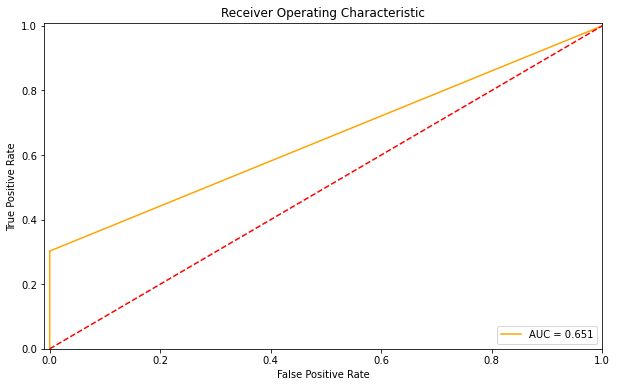

[0. 1.] [0. 1.] [1. 0.]


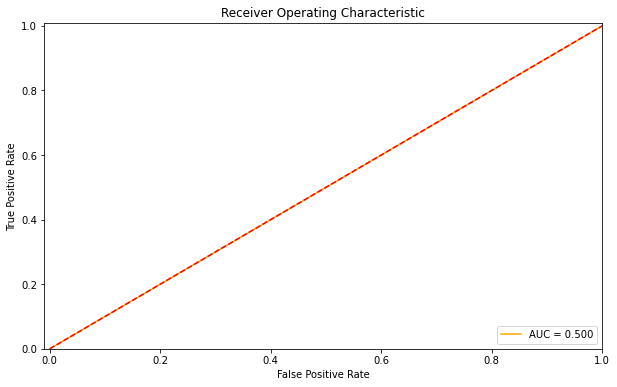

In [22]:
plot_roc_curve(y_val, predict_y)
plot_roc_curve(y_test, pred_test_y)

[0. 0. 1.] [0.         0.72368421 1.        ] [2. 1. 0.]


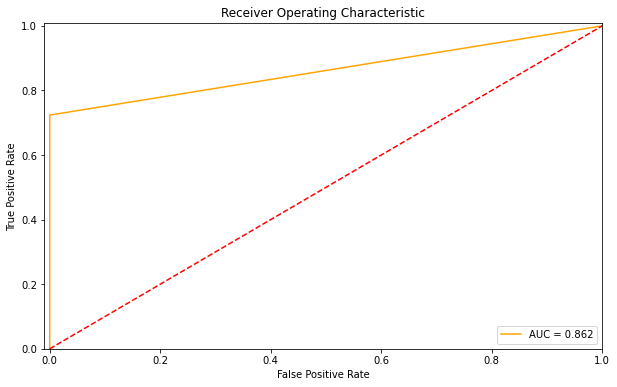

[0. 1.] [0. 1.] [1. 0.]


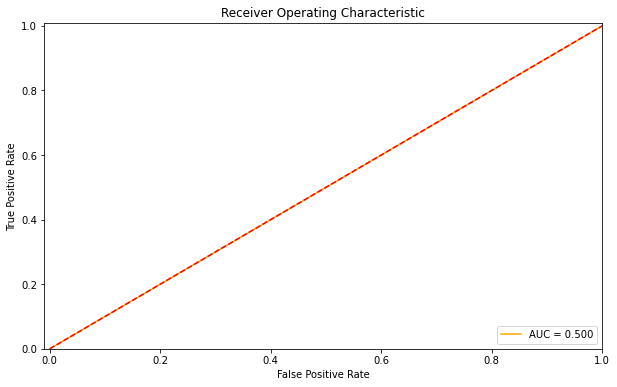

In [24]:
plot_roc_curve(y_val, rf_predict_y)
plot_roc_curve(y_test, rf_predict_test_y)

In [25]:
def plot_confusion_matrix(y_train, y_predict):
    conf_matrix= confusion_matrix(y_train, y_predict)
    LABELS=['Non_Default','Default'] #給出類別名稱
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_matrix,xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    plt.show()

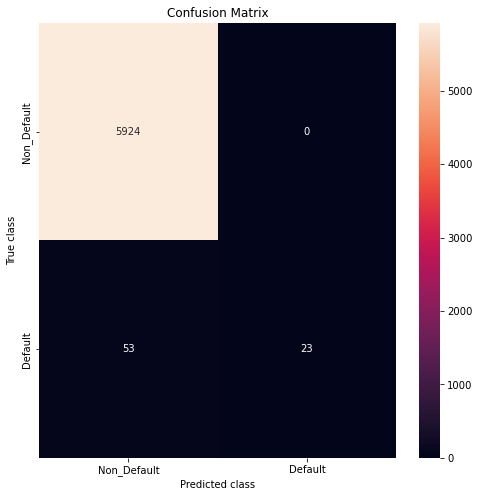

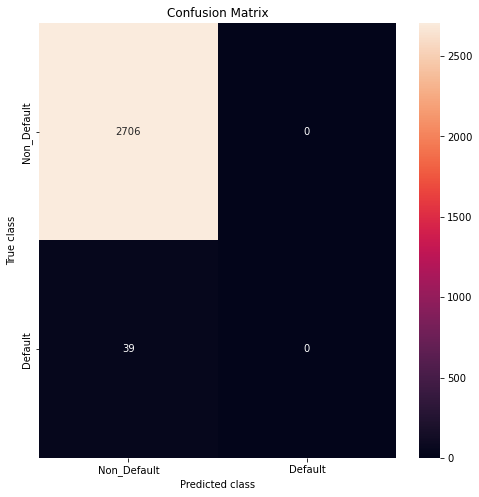

In [27]:
plot_confusion_matrix(y_val, predict_y)
plot_confusion_matrix(y_test, pred_test_y)

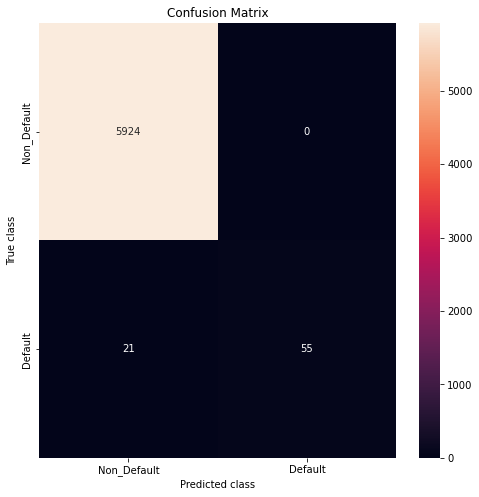

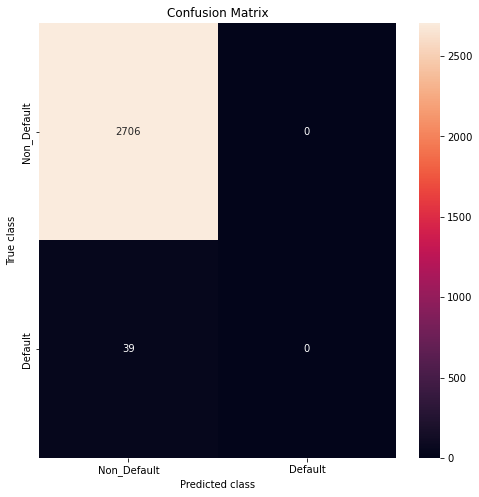

In [28]:
plot_confusion_matrix(y_val, rf_predict_y)
plot_confusion_matrix(y_test, rf_predict_test_y)